In [1]:
from sklearn.datasets import load_digits # same syntex is use all around with similar conditions.
import matplotlib.pyplot as plt

In [2]:
digits = load_digits() # 1,2,3.......9

In [3]:
print(digits["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
data = digits["data"]
labels = digits["target"]

In [5]:
data.shape

(1797, 64)

In [6]:
labels

array([0, 1, 2, ..., 8, 9, 8])

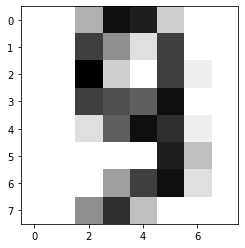

In [7]:
plt.imshow(data[1068].reshape(8,8),cmap=plt.cm.gray_r) # 9 for the 1068 place in dataset.

In [8]:
labels[1068] # we can confirm it too # THE ABOVE PICTURE HAVE 64 pixels

9

# DIMENTIONALITY REDUCTIONS

In [9]:
from sklearn.decomposition import PCA
# PCA - Principal Component Analysis

model = PCA(n_components=2) # here we are taking 2 dimensions instead of 64
transformed_data = model.fit_transform(data)

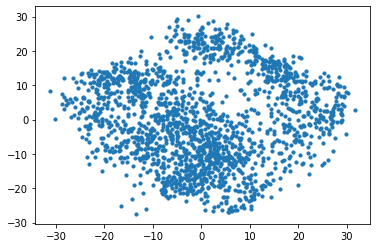

In [10]:
plt.scatter(transformed_data[:,0],transformed_data[:,1],s = 10)

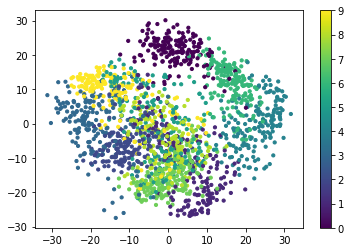

In [11]:
plt.scatter(transformed_data[:,0],transformed_data[:,1],s = 10, c= labels)
plt.colorbar()
# Here we can say that the labeled data shows us digits as categories and which can be visualized by colorbar as well

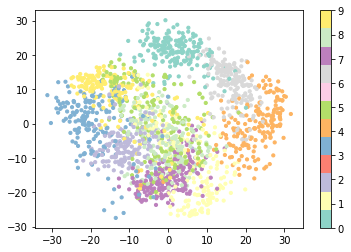

In [12]:
plt.scatter(transformed_data[:,0],transformed_data[:,1],s = 10, c= labels,cmap=plt.cm.Set3) # CATEGORIZED LEARNING
plt.colorbar()

In [13]:
model.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [14]:
# Let's do it for all 64 dimenssions
model = PCA(n_components=64)
model.fit(data)

PCA(n_components=64)

In [15]:
x = model.explained_variance_ratio_ # Variation for each dimension is now given
x

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

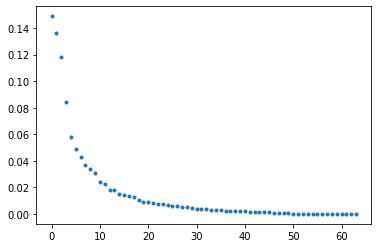

In [16]:
 # PLOT
plt.plot(x,".")

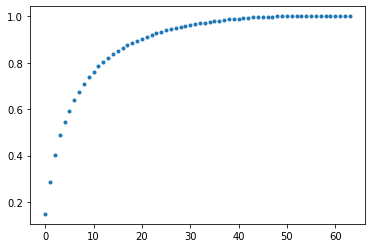

In [17]:
from numpy import cumsum
plt.plot(cumsum(x),".") # 80% of the information is contained in 10 dimenssions alone.

In [18]:
# LET' try another one
from sklearn.manifold import TSNE

In [19]:
# TSNE?

# CLASSIFICATION

In [20]:
from sklearn.model_selection import train_test_split
data_train ,data_test,labels_train,labels_test = train_test_split(data,labels,test_size=0.2) # Testing on 80%

In [21]:
data_train.shape

(1437, 64)

In [22]:
data_test.shape

(360, 64)

In [23]:
from sklearn.svm import SVC

In [24]:
model = SVC(gamma = 0.001)
model.fit(data_train,labels_train) # SUPERVISED Learning

SVC(gamma=0.001)

In [25]:
# predection on training set
prediction_train = model.predict(data_train)

# Predection on te_st data 
prediction_test = model.predict(data_test)

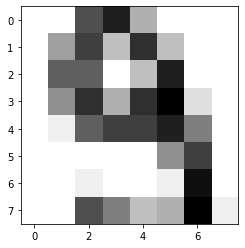

In [26]:
plt.imshow(data_test[0].reshape(8,8),cmap = plt.cm.gray_r)

In [27]:
print("Expected Label", labels_test[0])
print("Model Prediction",prediction_test[0]) # GOOD #COOL $$$$$$$

Expected Label 9
Model Prediction 9


In [28]:
labels_test == prediction_test # True '1' , False '0'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [29]:
(labels_test == prediction_test).mean() # hence, we get an accuracy of 98.888888% 

0.9888888888888889

In [30]:
# LET's TRY TO GET MORE ACCURACY
model = SVC(gamma = 1)
model.fit(data_train,labels_train) # SUPERVISED Learning

SVC(gamma=1)

In [31]:
# predection on training set
prediction_train = model.predict(data_train)

# Predection on te_st data 
prediction_test = model.predict(data_test)

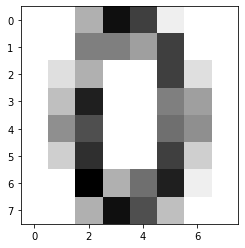

In [32]:
plt.imshow(data_test[10].reshape(8,8),cmap = plt.cm.gray_r)

In [33]:
print("Expected Label", labels_test[0])
print("Model Prediction",prediction_test[0]) # GOOD #COOL $$$$$$$

Expected Label 9
Model Prediction 7


In [34]:
(labels_test == prediction_test).mean() 

0.08333333333333333

In [35]:
# for higher and lower values of gamma we are getting very bad accuracy

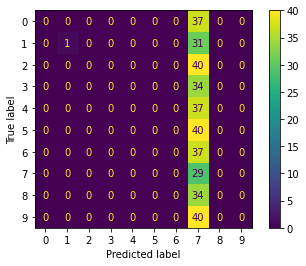

In [36]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model,data_test,labels_test)